In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import matplotlib.colors as colors

plt.rcParams["figure.figsize"] = (6, 4.5)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size': 20})

# constants

G = 6.67e-11 # [m3/kg/s2]
sbc = 5.67e-8 # Stefan Boltzmann constant W/m2/K4
au2m = 1.496e11 # convert au to m
cgs2si_flux = 1/1000 # convert flux from erg/cm2/s to W/m2
s2day = 1/(3600*24)
Re = 6.378e6 # Earth radius [m]
Me = 5.9722e24 # Earth mass [kg]
F_e = 1366 # Earth bolometric flux [W/m2]
L_solar = 3.828e26 # W
Ms = 1.98847e30 # Solar mass [kg]
Rs = 6.957e8 # Solar radius [m]

In [2]:
# composition curves from Li Zeng

Fe = np.loadtxt('/Users/collin/Documents/Harvard/Research/mass_radius/massradiusFe.txt', unpack = True)
MgSiO3 = np.loadtxt('/Users/collin/Documents/Harvard/Research/mass_radius/massradiusmgsio3.txt', unpack = True)
earthlike = np.loadtxt('/Users/collin/Documents/Harvard/Research/mass_radius/massradiusEarthlikeRocky.txt', unpack = True)
water100 = np.loadtxt('/Users/collin/Documents/Harvard/Research/mass_radius/massradius_100percentH2O_700K_1mbar.txt', unpack = True)
water50 = np.loadtxt('/Users/collin/Documents/Harvard/Research/mass_radius/massradius_50percentH2O_700K_1mbar.txt', unpack = True)
water1000 = np.loadtxt('/Users/collin/Documents/Harvard/Research/mass_radius/massradius_50percentH2O_1000K_1mbar.txt', unpack = True)
maxlimit = np.loadtxt('/Users/collin/Documents/Harvard/Research/mass_radius/massradiusMaxCollisionStripping.txt', unpack = True)
H300 = np.loadtxt('/Users/collin/Documents/Harvard/Research/mass_radius/Earthlike1h300K1mbar.txt', unpack = True)
H500 = np.loadtxt('/Users/collin/Documents/Harvard/Research/mass_radius/Earthlike1h500K1mbar.txt', unpack = True)
H700 = np.loadtxt('/Users/collin/Documents/Harvard/Research/mass_radius/Earthlike1h700K1mbar.txt', unpack = True)
H1000 = np.loadtxt('/Users/collin/Documents/Harvard/Research/mass_radius/Earthlike1h1000K1mbar.txt', unpack = True)
H01_300 = np.loadtxt('/Users/collin/Documents/Harvard/Research/mass_radius/Earthlike01h300K1mbar.txt', unpack = True)
H01_500 = np.loadtxt('/Users/collin/Documents/Harvard/Research/mass_radius/Earthlike01h500K1mbar.txt', unpack = True)
H01_700 = np.loadtxt('/Users/collin/Documents/Harvard/Research/mass_radius/Earthlike01h700K1mbar.txt', unpack = True)
water50_H01_700 = np.loadtxt('/Users/collin/Documents/Harvard/Research/mass_radius/halfh2o01h700K1mbar.txt', unpack = True)

# planet data
# NASA exoplanet archive, 0.8<R<3.5, 0.5<Mp<20, Ms<0.65
planets = pd.read_csv('/Users/collin/Documents/Harvard/Research/TOI-1695/mdwarf_planets.csv')
trappist1dh = pd.read_csv('/Users/collin/Documents/Harvard/Research/TOI-1695/trappist1dh.csv', skiprows = 53)


In [3]:
def Density(rp, mp):
    '''
    Calculates bulk density from planet mass/radius
    Input: rp [in Earth radii], mp [in Earth masses]
    Output: Mp/volume [in g/cm3]
    '''
    rp = rp*Re # converts to m
    mp = mp*Me*1000 # converts to g
    V = (4/3)*np.pi*rp**3*1e6 # converts to cubic cm
    return mp/V

def Luminosity(R, T):
    '''
    Input: R, stellar radius [m]; T, stellar temp [K]
    Output: luminosity [W]
    '''
    return 4*np.pi*R**2*sbc*T**4

def SemiMajor(M, P):
    '''
    Input: M, stellar mass [kg]; P, orbital period [s]
    Output: semi-major axis [m]
    '''
    return ((G*M/4/np.pi**2)*P**2)**(1/3)

def Insolation(R, T, M, P):
    '''
    Input: R, stellar radius [m]; T, stellar temp [K],
    M, stellar mass [kg]; P, orbital period [s]
    Output: incident stellar flux [W/m2]
    '''
    L = Luminosity(R, T)
    a = SemiMajor(M, P)
    return L/(4*np.pi*a**2)

def Teq(R, T, M, P, A = 0):
    '''
    Input: R, stellar radius [m]; T, stellar temp [K],
    M, stellar mass [kg]; P, orbital period [days]; A, albedo [ndim]
    Output: eq temp [K]
    '''
    L = Luminosity(R, T)
    a = SemiMajor(M, P)
    I = L/(4*np.pi*a**2)
    return (I*(1 - A)/4/sbc)**(1/4)

In [4]:
# TOI-1695b

R = 0.515*Rs
T = 3690 # K
M = 0.513*Ms
P = 3.13*24*3600

print('L =', Luminosity(R, T)/L_solar)
print('a =', SemiMajor(M, P)/au2m)
print('I =', Insolation(R, T, M, P)/F_e)
T_eq = Teq(R, T, M, P, A = 0)
print('Teq =', T_eq)

L = 0.044298082052684325
a = 0.03351515984159423
I = 39.296196060176854
Teq = 697.4924970799508


In [5]:
planets = pd.concat([trappist1dh, planets], ignore_index = True)

In [6]:
planets.head(10)

pl_name  disc_year                                       disc_refname  \
0  TRAPPIST-1 h       2017  <a refstr=GILLON_ET_AL__2016 href=https://ui.a...   
1  TRAPPIST-1 d       2016  <a refstr=GILLON_ET_AL__2016 href=https://ui.a...   
2  TRAPPIST-1 g       2017                                                NaN   
3  TRAPPIST-1 f       2017                                                NaN   
4  TRAPPIST-1 e       2017                                                NaN   
5  TRAPPIST-1 c       2016                                                NaN   
6  TRAPPIST-1 b       2016                                                NaN   
7     TOI-776 c       2020                                                NaN   
8     TOI-776 b       2020                                                NaN   
9     TOI-270 d       2019                                                NaN   

   pl_orbper  pl_orbpererr1  pl_orbpererr2  pl_orbsmax  pl_rade  pl_radeerr1  \
0  18.772866       0.000214      -0.000214     0.06189    0.755        0.014   
1   4.049219       0.000026      -0.000026     0.02227    0.788        0.011   
2  12.352446       0.000054      -0.000054     0.04683    1.129        0.015   
3   9.207540       0.000032      -0.000032     0.03849    1.045        0.013   
4   6.101013       0.000035      -0.000035     0.02925    0.920        0.013   
5   2.421937       0.000018      -0.000018     0.01580    1.097        0.014   
6   1.510826       0.000006      -0.000006     0.01154    1.116        0.014   
7  15.665300       0.000400      -0.000300     0.10000    2.020        0.140   
8   8.246610       0.000050      -0.000040     0.06520    1.850        0.130   
9  11.379573       0.000013      -0.000013     0.07210    2.133        0.058   

   pl_radeerr2  ...  st_rad  st_raderr1  st_raderr2  st_mass  st_masserr1  \
0       -0.014  ...    0.12        0.00        0.00     0.09         0.00   
1       -0.010  ...    0.12        0.00        0.00     0.09         0.00   
2       -0.013  ...    0.12        0.00        0.00     0.09         0.00   
3       -0.012  ...    0.12        0.00        0.00     0.09         0.00   
4       -0.012  ...    0.12        0.00        0.00     0.09         0.00   
5       -0.012  ...    0.12        0.00        0.00     0.09         0.00   
6       -0.012  ...    0.12        0.00        0.00     0.09         0.00   
7       -0.140  ...    0.54        0.02       -0.02     0.54         0.03   
8       -0.130  ...    0.54        0.02       -0.02     0.54         0.03   
9       -0.058  ...    0.38        0.01       -0.01     0.39         0.01   

   st_masserr2                                         pl_refname  pl_bmasse  \
0         0.00                                                NaN        NaN   
1         0.00                                                NaN        NaN   
2         0.00  <a refstr=AGOL_ET_AL__2021 href=https://ui.ads...      1.321   
3         0.00  <a refstr=AGOL_ET_AL__2021 href=https://ui.ads...      1.039   
4         0.00  <a refstr=AGOL_ET_AL__2021 href=https://ui.ads...      0.692   
5         0.00  <a refstr=AGOL_ET_AL__2021 href=https://ui.ads...      1.308   
6         0.00  <a refstr=AGOL_ET_AL__2021 href=https://ui.ads...      1.374   
7        -0.03  <a refstr=LUQUE_ET_AL__2020 href=https://ui.ad...      5.300   
8        -0.03  <a refstr=LUQUE_ET_AL__2020 href=https://ui.ad...      4.000   
9        -0.01  <a refstr=VAN_EYLEN_ET_AL__2021 href=https://u...      4.780   

   pl_bmasseerr1  pl_bmasseerr2  
0            NaN            NaN  
1            NaN            NaN  
2          0.038         -0.038  
3          0.031         -0.031  
4          0.022         -0.022  
5          0.056         -0.056  
6          0.069         -0.069  
7          1.800         -1.800  
8          0.900         -0.900  
9          0.430         -0.430  

[10 rows x 29 columns]

In [7]:
# add bulk density column

pl_masses = planets['pl_bmasse']
pl_radii = planets['pl_rade']
pl_densities = Density(pl_radii, pl_masses)
planets['pl_densities'] = pl_densities
planets[:8]

pl_name  disc_year                                       disc_refname  \
0  TRAPPIST-1 h       2017  <a refstr=GILLON_ET_AL__2016 href=https://ui.a...   
1  TRAPPIST-1 d       2016  <a refstr=GILLON_ET_AL__2016 href=https://ui.a...   
2  TRAPPIST-1 g       2017                                                NaN   
3  TRAPPIST-1 f       2017                                                NaN   
4  TRAPPIST-1 e       2017                                                NaN   
5  TRAPPIST-1 c       2016                                                NaN   
6  TRAPPIST-1 b       2016                                                NaN   
7     TOI-776 c       2020                                                NaN   

   pl_orbper  pl_orbpererr1  pl_orbpererr2  pl_orbsmax  pl_rade  pl_radeerr1  \
0  18.772866       0.000214      -0.000214     0.06189    0.755        0.014   
1   4.049219       0.000026      -0.000026     0.02227    0.788        0.011   
2  12.352446       0.000054      -0.000054     0.04683    1.129        0.015   
3   9.207540       0.000032      -0.000032     0.03849    1.045        0.013   
4   6.101013       0.000035      -0.000035     0.02925    0.920        0.013   
5   2.421937       0.000018      -0.000018     0.01580    1.097        0.014   
6   1.510826       0.000006      -0.000006     0.01154    1.116        0.014   
7  15.665300       0.000400      -0.000300     0.10000    2.020        0.140   

   pl_radeerr2  ...  st_raderr1  st_raderr2  st_mass  st_masserr1  \
0       -0.014  ...        0.00        0.00     0.09         0.00   
1       -0.010  ...        0.00        0.00     0.09         0.00   
2       -0.013  ...        0.00        0.00     0.09         0.00   
3       -0.012  ...        0.00        0.00     0.09         0.00   
4       -0.012  ...        0.00        0.00     0.09         0.00   
5       -0.012  ...        0.00        0.00     0.09         0.00   
6       -0.012  ...        0.00        0.00     0.09         0.00   
7       -0.140  ...        0.02       -0.02     0.54         0.03   

   st_masserr2                                         pl_refname  pl_bmasse  \
0         0.00                                                NaN        NaN   
1         0.00                                                NaN        NaN   
2         0.00  <a refstr=AGOL_ET_AL__2021 href=https://ui.ads...      1.321   
3         0.00  <a refstr=AGOL_ET_AL__2021 href=https://ui.ads...      1.039   
4         0.00  <a refstr=AGOL_ET_AL__2021 href=https://ui.ads...      0.692   
5         0.00  <a refstr=AGOL_ET_AL__2021 href=https://ui.ads...      1.308   
6         0.00  <a refstr=AGOL_ET_AL__2021 href=https://ui.ads...      1.374   
7        -0.03  <a refstr=LUQUE_ET_AL__2020 href=https://ui.ad...      5.300   

   pl_bmasseerr1  pl_bmasseerr2  pl_densities  
0            NaN            NaN           NaN  
1            NaN            NaN           NaN  
2          0.038         -0.038      5.044443  
3          0.031         -0.031      5.003327  
4          0.022         -0.022      4.883541  
5          0.056         -0.056      5.444776  
6          0.069         -0.069      5.432332  
7          1.800         -1.800      3.533572  

[8 rows x 30 columns]

In [8]:
planets[planets['st_teff']>=3900]
# cut st teff at 4000
# add missing trappist planets

pl_name  disc_year disc_refname  pl_orbper  pl_orbpererr1  \
15   TOI-1759 b       2022          NaN  18.849975       0.000006   
16   TOI-1759 b       2022          NaN  18.850190       0.000130   
17   TOI-1749 d       2021          NaN   9.049700       0.004900   
18   TOI-1749 c       2021          NaN   4.492900       0.003800   
45  Kepler-26 c       2011          NaN  17.255900       0.000600   
46  Kepler-26 b       2011          NaN  12.280000       0.000300   
60    GJ 9827 d       2017          NaN   6.201470       0.000063   
61    GJ 9827 c       2017          NaN   3.648096       0.000063   
62    GJ 9827 b       2017          NaN   1.208982       0.000007   

    pl_orbpererr2  pl_orbsmax  pl_rade  pl_radeerr1  pl_radeerr2  ...  \
15      -0.000006     0.11760    3.060        0.220       -0.220  ...   
16      -0.000130     0.11770    3.140        0.100       -0.100  ...   
17      -0.003200     0.07070    2.520        0.150       -0.150  ...   
18      -0.002700     0.04430    2.120        0.120       -0.120  ...   
45      -0.000600         NaN    2.720        0.120       -0.120  ...   
46      -0.000300         NaN    2.780        0.110       -0.110  ...   
60      -0.000061     0.05591    2.022        0.046       -0.043  ...   
61      -0.000062     0.03925    1.241        0.024       -0.026  ...   
62      -0.000007     0.01880    1.577        0.027       -0.031  ...   

    st_raderr1  st_raderr2  st_mass  st_masserr1  st_masserr2  \
15        0.02       -0.02     0.61         0.02        -0.02   
16        0.01       -0.01     0.61         0.02        -0.02   
17        0.03       -0.03     0.58         0.03        -0.03   
18        0.03       -0.03     0.58         0.03        -0.03   
45        0.02       -0.02     0.54         0.03        -0.03   
46        0.02       -0.02     0.54         0.03        -0.03   
60        0.01        0.00     0.61         0.02        -0.01   
61        0.01        0.00     0.61         0.02        -0.01   
62        0.01        0.00     0.61         0.02        -0.01   

                                           pl_refname  pl_bmasse  \
15  <a refstr=MARTIOLI_ET_AL__2022 href=https://ui...       6.80   
16  <a refstr=ESPINOZA_ET_AL__2022 href=https://ui...      10.80   
17  <a refstr=FUKUI_ET_AL__2021 href=https://ui.ad...      15.00   
18  <a refstr=FUKUI_ET_AL__2021 href=https://ui.ad...      14.00   
45  <a refstr=JONTOF_HUTTER_ET_AL__2016 href=https...       6.20   
46  <a refstr=JONTOF_HUTTER_ET_AL__2016 href=https...       5.12   
60  <a refstr=RICE_ET_AL__2019 href=https://ui.ads...       4.04   
61  <a refstr=RICE_ET_AL__2019 href=https://ui.ads...       0.84   
62  <a refstr=RICE_ET_AL__2019 href=https://ui.ads...       4.91   

    pl_bmasseerr1  pl_bmasseerr2  pl_densities  
15           2.00          -2.00      1.304178  
16           1.50          -1.50      1.917022  
17            NaN            NaN      5.150885  
18            NaN            NaN      8.074444  
45           0.65          -0.65      1.693079  
46           0.65          -0.61      1.309567  
60           0.82          -0.84      2.685531  
61            NaN            NaN      2.415217  
62           0.49          -0.49      6.879844  

[9 rows x 30 columns]

## get new dataframe with star name and get TRAPPIST

In [9]:
# set TRAPPIST ttv flags to 0 to keep them in dataset

planets.at[0, 'ttv_flag'] = 0
planets.at[1, 'ttv_flag'] = 0
planets.at[2, 'ttv_flag'] = 0
planets.at[3, 'ttv_flag'] = 0
planets.at[4, 'ttv_flag'] = 0
planets.at[5, 'ttv_flag'] = 0
planets.at[6, 'ttv_flag'] = 0

In [10]:
# make cuts, no ttv flags, density below 8.10, >3 sigma mass measurements

planets = planets.loc[planets['ttv_flag'] == 0]
planets = planets.loc[planets['st_teff'] < 4000]
planets = planets.loc[planets['pl_densities'] < 8.10]
planets = planets.loc[planets['pl_bmasse']/planets['pl_bmasseerr1'] > 3] 
planets.reset_index(inplace = True)

In [11]:
planets

index       pl_name  disc_year disc_refname  pl_orbper  pl_orbpererr1  \
0       2  TRAPPIST-1 g       2017          NaN  12.352446   5.400000e-05   
1       3  TRAPPIST-1 f       2017          NaN   9.207540   3.200000e-05   
2       4  TRAPPIST-1 e       2017          NaN   6.101013   3.500000e-05   
3       5  TRAPPIST-1 c       2016          NaN   2.421937   1.800000e-05   
4       6  TRAPPIST-1 b       2016          NaN   1.510826   6.000000e-06   
5       8     TOI-776 b       2020          NaN   8.246610   5.000000e-05   
6       9     TOI-270 d       2019          NaN  11.379573   1.300000e-05   
7      10     TOI-270 c       2019          NaN   5.660573   3.100000e-06   
8      11     TOI-270 b       2019          NaN   3.360154   4.800000e-06   
9      12     TOI-269 b       2021          NaN   3.697710   3.700000e-06   
10     15    TOI-1759 b       2022          NaN  18.849975   6.000000e-06   
11     19    TOI-1685 b       2021          NaN   0.669140   2.300000e-06   
12     20    TOI-1634 b       2021          NaN   0.989343   1.500000e-05   
13     23    TOI-1235 b       2020          NaN   3.444729   3.100000e-05   
14     24    TOI-1201 b       2021          NaN   2.491986   3.000000e-06   
15     25    LTT 3780 c       2020          NaN  12.251900   2.800000e-03   
16     26    LTT 3780 b       2020          NaN   0.768448   5.500000e-05   
17     27  LTT 1445 A c       2022          NaN   3.123903   3.400000e-06   
18     28  LTT 1445 A b       2019          NaN   5.358766   4.300000e-06   
19     31    LHS 1478 b       2021          NaN   1.949538   4.000000e-06   
20     32    LHS 1140 c       2018          NaN   3.777931   3.000000e-06   
21     33    LHS 1140 b       2017          NaN  24.736959   8.000000e-05   
22     34     L 98-59 d       2019          NaN   7.450724   8.100000e-06   
23     35     L 98-59 c       2019          NaN   3.690678   1.600000e-06   
24     56        K2-3 b       2015          NaN  10.054540   3.000000e-05   
25     57       K2-18 b       2015          NaN  32.939630   1.000000e-04   
26     63      GJ 486 b       2021          NaN   1.467119   3.100000e-05   
27     64     GJ 3929 b       2022          NaN   2.616274   2.900000e-06   
28     65      GJ 357 b       2019          NaN   3.930720   8.000000e-05   
29     66     GJ 3473 b       2020          NaN   1.198003   1.800000e-06   
30     67     GJ 1252 b       2020          NaN   0.518235   6.300000e-06   
31     68     GJ 1214 b       2009          NaN   1.580404   1.300000e-07   
32     69     GJ 1132 b       2015          NaN   1.628931   2.700000e-05   

    pl_orbpererr2  pl_orbsmax  pl_rade  pl_radeerr1  ...  st_raderr1  \
0   -5.400000e-05     0.04683    1.129        0.015  ...        0.00   
1   -3.200000e-05     0.03849    1.045        0.013  ...        0.00   
2   -3.500000e-05     0.02925    0.920        0.013  ...        0.00   
3   -1.800000e-05     0.01580    1.097        0.014  ...        0.00   
4   -6.000000e-06     0.01154    1.116        0.014  ...        0.00   
5   -4.000000e-05     0.06520    1.850        0.130  ...        0.02   
6   -1.300000e-05     0.07210    2.133        0.058  ...        0.01   
7   -3.100000e-06     0.04526    2.355        0.064  ...        0.01   
8   -4.800000e-06     0.03197    1.206        0.039  ...        0.01   
9   -3.700000e-06     0.03450    2.770        0.120  ...        0.01   
10  -6.000000e-06     0.11760    3.060        0.220  ...        0.02   
11  -2.100000e-06         NaN    1.700        0.070  ...        0.01   
12  -1.500000e-05     0.01545    1.790        0.080  ...        0.01   
13  -2.800000e-05     0.03845    1.738        0.087  ...        0.01   
14  -3.100000e-06     0.02870    2.415        0.091  ...        0.02   
15  -3.000000e-03     0.07673    2.300        0.160  ...        0.01   
16  -5.300000e-05     0.01211    1.332        0.072  ...        0.01   
17  -3.600000e-06     0.02661    1.147        0.055  ...        0.01   
18  -4.200000e-06

In [12]:
# re-calculate density

pl_masses = planets['pl_bmasse']
pl_radii = planets['pl_rade']
pl_densities = Density(pl_radii, pl_masses)

 - talk to li zeng, add more curves consistent with this comp
 - figure out how much H2 you need to explain at 840 K then calculate how long to escape and cocnlude that unlikely it's H2 unless we're lucky or it's in steady state with outgassing
 - email Evgenya about recommending fiducial values for XUV flux.
 - cut in mass precision


$$T=2\pi \sqrt{\frac{{r}^{3}}{G{M}_{\text{E}}}}.$$
For an ellipse, recall that the semi-major axis is one-half the sum of the perihelion and the aphelion. For a circular orbit, the semi-major axis (a) is the same as the radius for the orbit. In fact, (Figure) gives us Kepler’s third law if we simply replace r with a and square both sides.

$${T}^{2}=\frac{4{\pi }^{2}}{GM}{a}^{3}$$
We have changed the mass of Earth to the more general M, since this equation applies to satellites orbiting any large mass.

In [13]:
L_solar = 3.828e26 # W
1.3244122318278993e+21/L_solar

3.4598020685159335e-06

In [14]:
# for i in range(len(planets['pl_radeerr2'])):
#     if planets['pl_radeerr2'][i] == 'nan':
#         planets['pl_radeerr2'][i] = planets['pl_radeerr1'][i]
#     elif planets['pl_radeerr1'][i] == 'nan':
#         planets['pl_radeerr1'][i] = planets['pl_radeerr2'][i]

In [15]:
# create masks for various planet types

rocky_i = np.arange(len(planets))
rocky_i = rocky_i.tolist()
mid_i = []
gas_i = []

# gas
for i in range(len(planets)):
    if planets['pl_rade'][i] > 2.6:
        gas_i.append(i)
        
# intermediate

for i in range(len(planets)):
    if 2.2 < planets['pl_rade'][i] < 2.6:
        mid_i.append(i)
    elif 1.6 < planets['pl_rade'][i] < 2.2 and 3 < planets['pl_bmasse'][i] < 6:
        mid_i.append(i)
    elif 1.3 < planets['pl_rade'][i] < 1.7 and 1 < planets['pl_bmasse'][i] < 2.3:
        mid_i.append(i)
    elif planets['pl_rade'][i] > 1.2 and planets['pl_bmasse'][i] < 1:
        mid_i.append(i)

# rocky

for i in gas_i:
    rocky_i.remove(i)
    
for i in mid_i:
    rocky_i.remove(i)

# apply masks
        
rocky_orbper = np.array(planets['pl_orbper'][rocky_i])
rocky_rad = np.array(planets['pl_rade'][rocky_i])

mid_orbper = np.array(planets['pl_orbper'][mid_i])
mid_rad = np.array(planets['pl_rade'][mid_i])

gas_orbper = np.array(planets['pl_orbper'][gas_i])
gas_rad = np.array(planets['pl_rade'][gas_i])

In [16]:
planets

index       pl_name  disc_year disc_refname  pl_orbper  pl_orbpererr1  \
0       2  TRAPPIST-1 g       2017          NaN  12.352446   5.400000e-05   
1       3  TRAPPIST-1 f       2017          NaN   9.207540   3.200000e-05   
2       4  TRAPPIST-1 e       2017          NaN   6.101013   3.500000e-05   
3       5  TRAPPIST-1 c       2016          NaN   2.421937   1.800000e-05   
4       6  TRAPPIST-1 b       2016          NaN   1.510826   6.000000e-06   
5       8     TOI-776 b       2020          NaN   8.246610   5.000000e-05   
6       9     TOI-270 d       2019          NaN  11.379573   1.300000e-05   
7      10     TOI-270 c       2019          NaN   5.660573   3.100000e-06   
8      11     TOI-270 b       2019          NaN   3.360154   4.800000e-06   
9      12     TOI-269 b       2021          NaN   3.697710   3.700000e-06   
10     15    TOI-1759 b       2022          NaN  18.849975   6.000000e-06   
11     19    TOI-1685 b       2021          NaN   0.669140   2.300000e-06   
12     20    TOI-1634 b       2021          NaN   0.989343   1.500000e-05   
13     23    TOI-1235 b       2020          NaN   3.444729   3.100000e-05   
14     24    TOI-1201 b       2021          NaN   2.491986   3.000000e-06   
15     25    LTT 3780 c       2020          NaN  12.251900   2.800000e-03   
16     26    LTT 3780 b       2020          NaN   0.768448   5.500000e-05   
17     27  LTT 1445 A c       2022          NaN   3.123903   3.400000e-06   
18     28  LTT 1445 A b       2019          NaN   5.358766   4.300000e-06   
19     31    LHS 1478 b       2021          NaN   1.949538   4.000000e-06   
20     32    LHS 1140 c       2018          NaN   3.777931   3.000000e-06   
21     33    LHS 1140 b       2017          NaN  24.736959   8.000000e-05   
22     34     L 98-59 d       2019          NaN   7.450724   8.100000e-06   
23     35     L 98-59 c       2019          NaN   3.690678   1.600000e-06   
24     56        K2-3 b       2015          NaN  10.054540   3.000000e-05   
25     57       K2-18 b       2015          NaN  32.939630   1.000000e-04   
26     63      GJ 486 b       2021          NaN   1.467119   3.100000e-05   
27     64     GJ 3929 b       2022          NaN   2.616274   2.900000e-06   
28     65      GJ 357 b       2019          NaN   3.930720   8.000000e-05   
29     66     GJ 3473 b       2020          NaN   1.198003   1.800000e-06   
30     67     GJ 1252 b       2020          NaN   0.518235   6.300000e-06   
31     68     GJ 1214 b       2009          NaN   1.580404   1.300000e-07   
32     69     GJ 1132 b       2015          NaN   1.628931   2.700000e-05   

    pl_orbpererr2  pl_orbsmax  pl_rade  pl_radeerr1  ...  st_raderr1  \
0   -5.400000e-05     0.04683    1.129        0.015  ...        0.00   
1   -3.200000e-05     0.03849    1.045        0.013  ...        0.00   
2   -3.500000e-05     0.02925    0.920        0.013  ...        0.00   
3   -1.800000e-05     0.01580    1.097        0.014  ...        0.00   
4   -6.000000e-06     0.01154    1.116        0.014  ...        0.00   
5   -4.000000e-05     0.06520    1.850        0.130  ...        0.02   
6   -1.300000e-05     0.07210    2.133        0.058  ...        0.01   
7   -3.100000e-06     0.04526    2.355        0.064  ...        0.01   
8   -4.800000e-06     0.03197    1.206        0.039  ...        0.01   
9   -3.700000e-06     0.03450    2.770        0.120  ...        0.01   
10  -6.000000e-06     0.11760    3.060        0.220  ...        0.02   
11  -2.100000e-06         NaN    1.700        0.070  ...        0.01   
12  -1.500000e-05     0.01545    1.790        0.080  ...        0.01   
13  -2.800000e-05     0.03845    1.738        0.087  ...        0.01   
14  -3.100000e-06     0.02870    2.415        0.091  ...        0.02   
15  -3.000000e-03     0.07673    2.300        0.160  ...        0.01   
16  -5.300000e-05     0.01211    1.332        0.072  ...        0.01   
17  -3.600000e-06     0.02661    1.147        0.055  ...        0.01   
18  -4.200000e-06

In [17]:
planets['pl_orbsmax'][11] = SemiMajor(planets['st_mass'][11]*Ms, planets['pl_orbper'][11]/s2day)/au2m
planets['pl_orbsmax'][11]

0.011800926335895221

In [18]:
lower_err = np.array(planets['pl_radeerr2'][rocky_i])*-1
upper_err = np.array(planets['pl_radeerr1'][rocky_i])
rocky_err = [lower_err, upper_err]

lower_err = np.array(planets['pl_radeerr2'][mid_i])*-1
upper_err = np.array(planets['pl_radeerr1'][mid_i])
mid_err = [lower_err, upper_err]

lower_err = np.array(planets['pl_radeerr2'][gas_i])*-1
upper_err = np.array(planets['pl_radeerr1'][gas_i])
gas_err = [lower_err, upper_err]


In [19]:
len(planets)

33

In [20]:
# keystone planet indices for overplotting below

print(planets.loc[5, 'pl_name'])
print(planets.loc[11, 'pl_name'])
print(planets.loc[12, 'pl_name'])
print(planets.loc[13, 'pl_name'])

TOI-776 b
TOI-1685 b
TOI-1634 b
TOI-1235 b


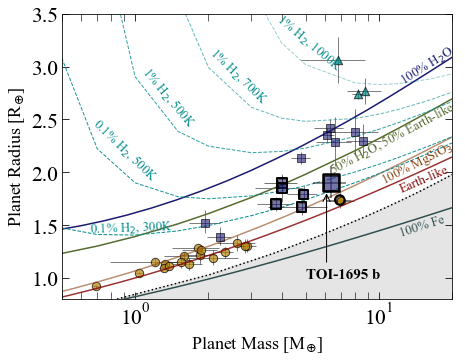

In [54]:
# compositions

plt.rcParams["figure.figsize"] = (7, 5.25)
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({'font.size': 18})

plt.plot(Fe[0], Fe[1], 'darkslategray') # 100% Fe
plt.annotate('100% Fe', (12, 1.4), fontsize = 13, color = 'darkslategray', rotation = 18)

plt.plot(maxlimit[0], maxlimit[1], ':', color = 'black') # max collision stripping

plt.plot(earthlike[0], earthlike[1], 'maroon', alpha = 0.8) # Earth-like
plt.annotate('Earth-like', (12, 1.82), fontsize = 13, color = 'maroon', rotation = 23.5)

plt.plot(MgSiO3[0], MgSiO3[1], 'saddlebrown', alpha = 0.6) # 100% MgSiO3
plt.annotate('100% MgSiO$_3$', (10, 1.90), fontsize = 13, color = 'saddlebrown', rotation = 27)

plt.plot(water100[0], water100[1], 'midnightblue') # 100% H2O 500 K
plt.annotate('100% H$_2$O', (12, 2.84), fontsize = 13, color = 'midnightblue', rotation = 32)

plt.plot(water50[0], water50[1], 'darkolivegreen') # 50% H2O, 50% Earth-like, 700 K
plt.annotate('50% H$_2$O, 50% Earth-like', (6.20, 1.98), fontsize = 13, color = 'darkolivegreen', rotation = 28)

#plt.plot(H300[0], H300[1], '--', lw = 1, color = 'darkcyan') # Earth-like + 1% H2, 300 K
#plt.annotate('1% H$_2$, 300K', (0.5, 1.82), fontsize = 13, color = 'darkcyan', rotation = -28)

#plt.plot(water50_H01_700[0], water50_H01_700[1], '--', color = 'red')

plt.plot(H01_300[0], H01_300[1], '--', lw = 1, color = 'darkcyan') # Earth-like + 0.1% H2, 300K
plt.annotate('0.1% H$_2$, 300K', (0.65, 1.425), fontsize = 13, color = 'darkcyan', rotation = 2)

plt.plot(H01_500[0], H01_500[1], '--', lw = 1, color = 'darkcyan', alpha = 0.9) # Earth-like + 0.1% H2, 500K
plt.annotate('0.1% H$_2$, 500K', (0.65, 1.92), fontsize = 13, color = 'darkcyan', rotation = -44)

#plt.plot(H01_700[0], H01_700[1], '--', lw = 1, color = 'red', alpha = 0.9) # Earth-like + 0.1% H2, 700K

plt.plot(H500[0], H500[1], '--', lw = 1, color = 'darkcyan', alpha = 0.8) # Earth-like + 1% H2, 500 K
plt.annotate('1% H$_2$, 500K', (1.03, 2.43), fontsize = 13, color = 'darkcyan', rotation = -50)

plt.plot(H700[0], H700[1], '--', lw = 1, color = 'darkcyan', alpha = 0.6) # Earth-like + 1% H2, 700 K
plt.annotate('1% H$_2$, 700K', (1.95, 2.65), fontsize = 13, color = 'darkcyan', rotation = -44)

plt.plot(H1000[0], H1000[1], '--', lw = 1, color = 'darkcyan', alpha = 0.4) # Earth-like + 1% H2, 1000 K
plt.annotate('1% H$_2$, 1000K', (3.69, 2.96), fontsize = 13, color = 'darkcyan', rotation = -40)



# planets

# TOI-1695 b
plt.errorbar(6.36, 1.90, yerr = ([0.14], [0.16]), xerr = 1.0, ecolor = 'k', alpha = 0.6,
             marker = 's', ms = 15, mfc = 'midnightblue', mec = 'k', mew = '2')

# TOI-1452 b
plt.errorbar(4.82, 1.67, yerr = ([0.07], [0.07]), xerr = 1.3, ecolor = 'k', alpha = 0.55,
             marker = 's', ms = 8, mfc = 'midnightblue', mec = 'k', mew = '1', elinewidth = 1)

# G 9-40 b
plt.errorbar(4.0, 1.90, yerr = ([0.065], [0.065]), xerr = 0.63, ecolor = 'k', alpha = 0.55,
             marker = 's', ms = 8, mfc = 'midnightblue', mec = 'k', mew = '1', elinewidth = 1)

# remaining planets
plt.errorbar(pl_masses, pl_radii, fmt = 'none', yerr = [planets['pl_radeerr2']*-1, 
            planets['pl_radeerr1']], elinewidth = 1, xerr = [planets['pl_bmasseerr2']*-1, 
            planets['pl_bmasseerr1']], color = 'k', alpha = 0.5, zorder = -10)

plt.scatter(planets['pl_bmasse'][rocky_i], planets['pl_rade'][rocky_i], marker =  'o', 
            edgecolors = 'k', alpha = 0.7, s = 70, color = 'darkgoldenrod')
plt.scatter(planets['pl_bmasse'][mid_i], planets['pl_rade'][mid_i], marker = 's', 
            edgecolors = 'k', alpha = 0.6, s = 70, color = 'midnightblue', zorder = 20)
plt.scatter(planets['pl_bmasse'][gas_i], planets['pl_rade'][gas_i], marker = '^', 
            edgecolors = 'k', alpha = 0.7, s = 70, color = 'darkcyan')

# highlight keystones (overplotting)
plt.scatter(planets.loc[5, 'pl_bmasse'], planets.loc[5, 'pl_rade'], marker =  's', # 776 b
            edgecolors = 'k', alpha = 1.0, s = 90, color = 'none', lw = 2, zorder = 15) 
plt.scatter(planets.loc[11, 'pl_bmasse'], planets.loc[11, 'pl_rade'], marker =  's', # 1685 b
            edgecolors = 'k', alpha = 1.0, s = 90, color = 'none', lw = 2, zorder = 15)
plt.scatter(planets.loc[12, 'pl_bmasse'], planets.loc[12, 'pl_rade'], marker =  's', # 1634 b
            edgecolors = 'k', alpha = 1.0, s = 90, color = 'none', lw = 2, zorder = 15)
plt.scatter(planets.loc[13, 'pl_bmasse'], planets.loc[13, 'pl_rade'], marker =  'o', # 1235
            edgecolors = 'k', alpha = 1.0, s = 90, color = 'none', lw = 2, zorder = 15)
plt.scatter(4.82, 1.67, marker =  's', # 1452 b
            edgecolors = 'k', alpha = 1.0, s = 90, color = 'none', lw = 2, zorder = 15)
plt.scatter(6.36, 1.90, marker =  's', # 1695 b
            edgecolors = 'k', alpha = 1.0, s = 280, color = 'none', lw = 2.5, zorder = 15)
plt.scatter(4.0, 1.90, marker =  's', # G 9-40 b
            edgecolors = 'k', alpha = 1.0, s = 90, color = 'none', lw = 2, zorder = 15)

# annotations
plt.annotate('TOI-1695 b', (5.0, 1.0), fontsize = 15, color = 'k', weight = 'bold')

plt.annotate("",
            xy=(6.1, 1.82), xycoords='data',
            xytext=(6.1, 1.13), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

# keystone planet checks
# plt.plot(6.91, 1.738, 'o', color = 'red', ms = 5) # 1235 b
# plt.plot(4.0, 1.85, 'o', color = 'red', ms = 5) # 776 b
# plt.plot(4.91, 1.79, 'o', color = 'red', ms = 5) # 1634 b
# plt.plot(3.78, 1.70, 'o', color = 'red', ms = 5) # 1685 b
# plt.plot(4.82, 1.67, 'o', color = 'red', ms = 5, zorder = 10) # 1452 b
# plt.plot(4.00, 1.90, 'o', color = 'red', ms = 5, zorder = 10) # G 9-40 b

# plt.plot(6.98, 1.727, 'o', color = 'red', ms = 5, zorder = 10) # LHS 1140 b

#[plt.axhline(i, linestyle = '--', lw = 0.5) for i in np.linspace(0.5, 3.5, 31)]

plt.xscale('log')
plt.ylabel('Planet Radius [R$_{\oplus}$]')
plt.xlabel('Planet Mass [M$_{\oplus}$]')
plt.tick_params(which = 'both', labelsize = 'large', top = True, right = True, 
                direction = 'in', length = 7)
#plt.yticks(np.arange(0.8, 3.5, 0.1))
plt.fill_between(maxlimit[0], 0, maxlimit[1], color = 'grey', alpha = 0.2)
plt.ylim(0.8, 3.5)
plt.xlim(0.5, 20);
#plt.savefig('mass_radius_plot_v2.png', dpi=300, bbox_inches='tight')


In [ ]:
##### calculate instellation

sbc = 5.67e-8 # Stefan Boltzmann constant W/m2/K4
F_e = 1366 # Earth bolometric flux [W/m2]
au2m = 1.496e11 # convert au to m
Rs = 6.957e8 # Solar radius [m]

luminosity = 4*np.pi*(planets['st_rad']*Rs)**2*sbc*planets['st_teff']**4
instellation = luminosity/(4*np.pi*(planets['pl_orbsmax']*au2m)**2)
instellation = instellation/F_e
planets['instellation'] = instellation
planets['instellation']

In [30]:
 instellation.max()

232.67589958080603

In [31]:
# TOI-1452 b instellation

print(Insolation(0.275*Rs, 3185, 0.249*Ms, 11.1/s2day)/F_e)

# G 9-40 b instellation

print(Insolation(0.3026*Rs, 3395, 0.2952*Ms, 5.75/s2day)/F_e)

1.8619765792569634
6.245447320920879


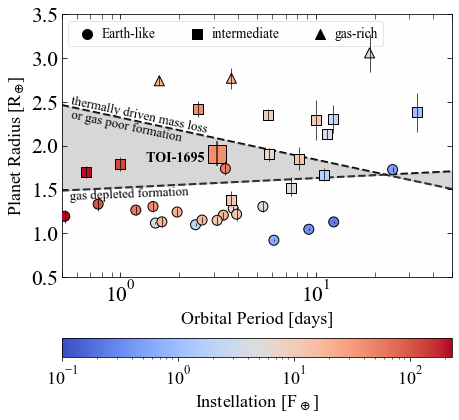

In [58]:
plt.rcParams["figure.figsize"] = (7,7)

#ax = plt.gca()

period = np.logspace(np.log(0.5), np.log(100), 100, base = np.exp(1))
radius = np.linspace(0.5, 3.5, 100)


# models
plt.plot(period, 0.11*np.log10(period) + 1.52, '--', color = 'k', lw = 2, zorder = -20) # thermally driven mass loss
plt.plot(period, -0.48*np.log10(period) + 2.32, '--', color = 'k', lw = 2, zorder = -20) # gas depleted formation
plt.annotate('thermally driven mass loss', (0.55, 2.15), fontsize = 13, rotation = -12, zorder = 50)
plt.annotate('or gas poor formation', (0.55, 2.05), fontsize = 13, rotation = -12, zorder = 50)
plt.annotate('gas depleted formation', (0.55, 1.38), fontsize = 13, rotation = 2.3, zorder = 50)

# planets

plt.scatter(3.13, 1.90, marker = 's', c = 39,
            cmap = plt.get_cmap('coolwarm'), edgecolors = 'k', s = 300, zorder = 19,
           norm = colors.LogNorm(vmin = 0.1, vmax = instellation.max())) #toi-1695 b

plt.errorbar(3.13, 1.90, yerr = ([0.13], [0.15]), ecolor = 'k', zorder = 20,
             fmt = 'none', alpha = 0.8) # TOI-1695 b

plt.scatter(11.06, 1.67, marker = 's', c = 1.86,
            cmap = plt.get_cmap('coolwarm'), edgecolors = 'k', s = 100, zorder = 19,
           norm = colors.LogNorm(vmin = 0.1, vmax = instellation.max())) #toi-1452 b

plt.errorbar(11.06, 1.67, yerr = ([0.07], [0.07]), ecolor = 'k', zorder = 20,
             fmt = 'none', alpha = 0.7, elinewidth = 1) # TOI-1452 b

plt.scatter(5.75, 1.90, marker = 's', c = 6.25,
            cmap = plt.get_cmap('coolwarm'), edgecolors = 'k', s = 100, zorder = 19,
           norm = colors.LogNorm(vmin = 0.1, vmax = instellation.max())) # G 9-40 b

plt.errorbar(5.75, 1.90, yerr = ([0.07], [0.07]), ecolor = 'k', zorder = 20,
             fmt = 'none', alpha = 0.7, elinewidth = 1) # G 9-40 b


plt.scatter(rocky_orbper, rocky_rad, c = instellation[rocky_i], zorder = 19, 
            norm = colors.LogNorm(vmin = 0.1, vmax = instellation.max()),
            cmap = plt.get_cmap('coolwarm'), edgecolors = 'k', s = 100, alpha = 1.0)
plt.scatter(mid_orbper, mid_rad, marker = 's', c = instellation[mid_i], zorder = 19,
            norm = colors.LogNorm(vmin = 0.1, vmax = instellation.max()),
            cmap = plt.get_cmap('coolwarm'), edgecolors = 'k', s = 100, alpha = 1.0)
plt.scatter(gas_orbper, gas_rad, marker = '^', c = instellation[gas_i], zorder = 19,
            norm = colors.LogNorm(vmin = 0.1, vmax = instellation.max()),
            cmap = plt.get_cmap('coolwarm'), edgecolors = 'k', s = 100, alpha = 1.0)


plt.errorbar(rocky_orbper, rocky_rad, yerr = rocky_err, fmt = 'none', 
             ecolor = 'k', zorder = 20, elinewidth = 1, alpha = 0.7)

plt.errorbar(mid_orbper, mid_rad, yerr = mid_err, fmt = 'none', 
             ecolor = 'k', zorder = 20, elinewidth = 1, alpha = 0.7)

plt.errorbar(gas_orbper, gas_rad, yerr = gas_err, fmt = 'none', 
             ecolor = 'k', zorder = 20, elinewidth = 1, alpha = 0.7)

plt.annotate('TOI-1695 b', (1.35, 1.82), fontsize = 14, color = 'k', weight = 'bold')

plt.colorbar(label = 'Instellation [F$_\oplus$]', 
             orientation = 'horizontal', pad = 0.16)
plt.ylim(0.5, 3.5)
plt.xlim(0.5, 50)
plt.tick_params(which = 'both', labelsize = 'large', top = True, right = True, 
                direction = 'in', length = 5)
plt.ylabel('Planet Radius [R$_{\oplus}$]')
plt.xlabel('Orbital Period [days]')
y1 = 0.11*np.log10(period) + 1.52
y2 = -0.48*np.log10(period) + 2.32
plt.fill_between(period, y1, y2, color = 'grey', alpha = 0.3)
plt.rcParams["figure.figsize"] = (8,8)
#ax.set_facecolor('whitesmoke')
plt.fill_between(period, 0.5, 3.5, color = 'snow', alpha = 0.2, zorder = -50)
plt.xscale('log');

#legend = plt.legend(ncol = 3, loc = 2, fontsize=13.5, markerscale=1, framealpha = 0.5, handletextpad = 0.1)
# handles = legend.legendHandles
# #hatches = ['o', 's', '^']
# colours = ['k', 'k', 'k']
# for i, handle in enumerate(handles):
#     handle.set_edgecolor("k") # set_edgecolors
#     handle.set_facecolor(colours[i])
# #    handle.set_hatch(hatches[i])
# leg = ax.get_legend()
# leg.legendHandles[0].set_color('k')
plt.scatter(100, 1, s = 100, c = 'k', label = 'Earth-like', marker = 'o')
plt.scatter(100, 1, s = 100, c = 'k', label = 'intermediate', marker = 's')
plt.scatter(100, 1, s = 100, c = 'k', label = 'gas-rich', marker = '^')
legend = plt.legend(ncol = 3, loc = 2, fontsize=13.5, markerscale=1, framealpha = 0.5, handletextpad = 0.1)
# legend.legendHandles[0].set_color('k')
# legend.legendHandles[1].set_color('k')

#plt.savefig('period_radius_plot_v2.png', dpi = 300, bbox_inches='tight')


In [66]:
mid_rad, mid_orbper, instellation[mid_i]

(array([1.85 , 2.133, 2.355, 1.7  , 1.79 , 2.415, 2.3  , 1.521, 1.385,
        2.29 , 2.38 ]),
 array([ 8.24661  , 11.379573 ,  5.6605731,  0.6691403,  0.989343 ,
         2.4919863, 12.2519   ,  7.4507245,  3.6906777, 10.05454  ,
        32.93963  ]),
 5      11.652868
 6       3.767537
 7       9.560903
 11           NaN
 12    120.946875
 14     41.381746
 15      2.569714
 22      4.652067
 23     11.889713
 24     11.578042
 25      1.053917
 dtype: float64)

In [17]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

